In [19]:
import time
from collections import namedtuple

try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np

import scipy.ndimage

try:
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker
except:
    !pip install matplotlib
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker

try:
    from skimage import io as skimage_io
except:
    !pip install scikit-image
    from skimage import io as skimage_io

try:
    import information_theory as IT
except:
    !pip install "information_theory @ git+https://github.com/vicente-gonzalez-ruiz/information_theory"
    import information_theory as IT

import utils
from PIL import Image

In [20]:
# apt install cm-super-minimal
# apt install dvipng
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica",
    "font.family": "Serif",
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amsfonts}"
})

In [21]:
Args = namedtuple("args", ["input"])
args = Args("2d_gaussian.png")

In [22]:
try:
    X = skimage_io.imread(args.input)
except FileNotFoundError:
    %run 2d_gaussian.ipynb
    X = skimage_io.imread(args.input)

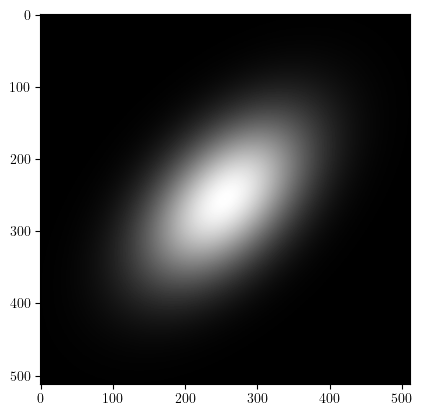

In [23]:
utils.imshow(X)

In [24]:
STD_DEV = 100
N = utils.generate_0MWGN(rows=X.shape[1], cols=X.shape[0], mean=0, stddev=STD_DEV)
Y = X + N
Y = np.clip(a = Y, a_min=0, a_max=255)
PSNR = IT.distortion.PSNR(Y, X)

-464.2183803824487 430.7515082641031


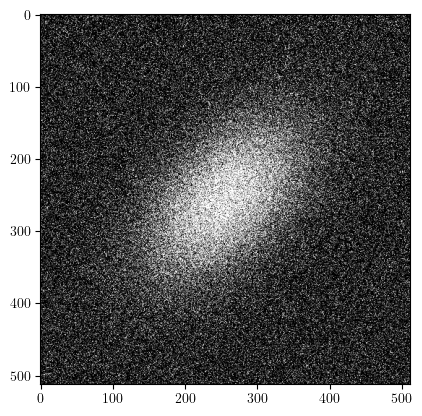

In [25]:
utils.imshow(Y)

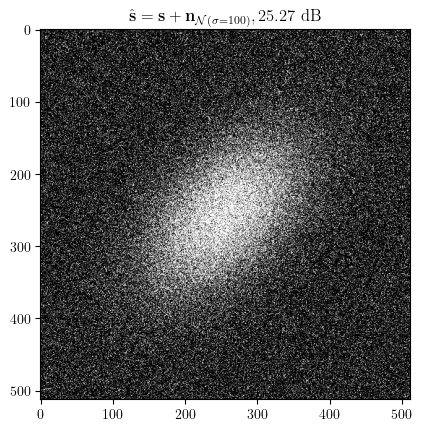

In [27]:
string  = r'$\hat{\mathbf{s}}='
string += r"\mathbf{s} + \mathbf{n}_{\mathcal{N}"
string += r"(\sigma"
string += f"={STD_DEV})"
string += r'}'
string += rf", {PSNR:.2f}"
string += r"~\mathrm{dB}"
string += '$'
plt.title(string)
#plt.imshow(utils.equalize_grayscale_image(Y), cmap="gray")
plt.imshow(Y, cmap="gray")
plt.savefig('ZAWG_2d_gaussian.pdf', bbox_inches='tight', pad_inches=0)

In [17]:
pil_image = Image.fromarray(Y.astype(np.uint8))
pil_image.save('ZAWG_2d_gaussian.png')

In [10]:
#cv2.imwrite("ZAWG_2d_gaussian.png", Y)